In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(columns={'PassengerId'},inplace=True)
df.drop(columns={'Name'},inplace=True)
df.drop(columns={'Ticket'},inplace=True)
df.drop(columns={'Cabin'},inplace=True)
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [8]:
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64


In [9]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
gender= pd.get_dummies(df['Sex'],drop_first=True)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
embarked= pd.get_dummies(df['Embarked'])
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [13]:
df =pd.concat([df,gender,embarked],axis=1)

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,C,Q,S
0,0,3,male,22.000000,1,0,7.2500,S,1,0,0,1
1,1,1,female,38.000000,1,0,71.2833,C,0,1,0,0
2,1,3,female,26.000000,0,0,7.9250,S,0,0,0,1
3,1,1,female,35.000000,1,0,53.1000,S,0,0,0,1
4,0,3,male,35.000000,0,0,8.0500,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,0,0,1
887,1,1,female,19.000000,0,0,30.0000,S,0,0,0,1
888,0,3,female,29.699118,1,2,23.4500,S,0,0,0,1
889,1,1,male,26.000000,0,0,30.0000,C,1,1,0,0


In [15]:
df.drop(columns={'Sex'},inplace=True)
df.drop(columns={'Embarked'},inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0


In [16]:
df.rename(columns={'male':'gender'},inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

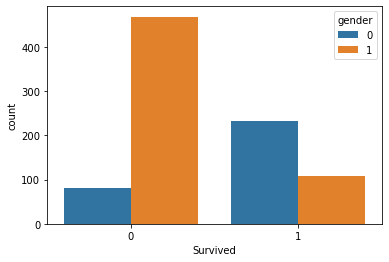

In [17]:
sb.countplot(x='Survived', hue='gender',data=df )

<AxesSubplot:xlabel='Pclass', ylabel='count'>

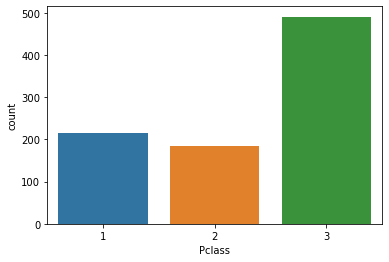

In [18]:
sb.countplot(x='Pclass', data=df )

<AxesSubplot:>

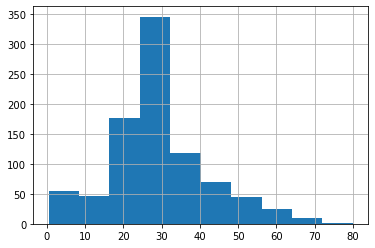

In [19]:
df['Age'].hist()

In [20]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0


In [21]:
X = df.drop(columns=['Survived'])
y=df['Survived']

In [22]:
from sklearn.model_selection import train_test_split



In [23]:
 X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.3 , random_state=42)

In [24]:
X_train.shape

(623, 9)

In [25]:
X_test.shape

(268, 9)

In [26]:
y_train.shape

(623,)

In [27]:
y_test.shape

(268,)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
l = LogisticRegression(max_iter=5000)
l.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [30]:
p= l.predict(X_test)
p

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [31]:
y_test.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix


In [33]:
confusion_matrix(y_test,p)

array([[136,  21],
       [ 30,  81]], dtype=int64)

In [34]:
from sklearn.metrics  import classification_report

In [35]:
 classification_report(y_test,p)

'              precision    recall  f1-score   support\n\n           0       0.82      0.87      0.84       157\n           1       0.79      0.73      0.76       111\n\n    accuracy                           0.81       268\n   macro avg       0.81      0.80      0.80       268\nweighted avg       0.81      0.81      0.81       268\n'

In [36]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [37]:
m = { 'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'DT':DecisionTreeRegressor(),
    'SVR':SVR(kernel='linear'),
    }

In [38]:
for name,model in m.items():
    print(f'using: {name}')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'training accuaracy: {model.score(X_train,y_train)}')
    print(f'testing accuaracy: {model.score(X_test,y_test)}')
    print(f'r2 - testing:{r2_score(y_test,y_pred)} ')

using: LR
training accuaracy: 0.3759153404346852
testing accuaracy: 0.43989075861661453
r2 - testing:0.43989075861661453 
using: KNN
training accuaracy: 0.37584415584415565
testing accuaracy: 0.15726172031904495
r2 - testing:0.15726172031904495 
using: DT
training accuaracy: 0.9518398268398268
testing accuaracy: -0.055131564685704904
r2 - testing:-0.055131564685704904 
using: SVR
training accuaracy: 0.22355970482547216
testing accuaracy: 0.27344747221887467
r2 - testing:0.27344747221887467 


In [39]:
import joblib
joblib.dump(m, 'm.h5')
joblib.dump(s, 's.h5')

['s.h5']